<a href="https://colab.research.google.com/github/VaggelisApostolou/auth-dws-ml-2025/blob/main/ML_Exercise8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [7]:
import numpy as np
import os
import cv2
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# **Ερωτήματα**

In [2]:
!unzip -q archive.zip

In [3]:
IMG_SIZE = 64
path = "dataset"
data = []
labels = []

In [4]:
breeds = os.listdir(path)
for breed in breeds:
    breed_path = os.path.join(path, breed)
    if os.path.isdir(breed_path):
        for img_name in os.listdir(breed_path):
            img_path = os.path.join(breed_path, img_name)
            img_array = cv2.imread(img_path)
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            data.append(new_array)
            labels.append(breed)

In [5]:
X = np.array(data) / 255.0
y = np.array(labels)
lb = LabelBinarizer()
y = lb.fit_transform(y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Σχήμα εικόνων (X_train): {X_train.shape}")
print(f"Σχήμα labels (y_train): {y_train.shape}")
print(f"Πλήθος κατηγοριών: {len(lb.classes_)}")

Σχήμα εικόνων (X_train): (773, 64, 64, 3)
Σχήμα labels (y_train): (773, 10)
Πλήθος κατηγοριών: 10


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input

num_classes = len(lb.classes_)
model_mlp = Sequential()
model_mlp.add(Input(shape=(64, 64, 3)))
model_mlp.add(Flatten())
model_mlp.add(Dense(512, activation='relu'))
model_mlp.add(Dense(128, activation='relu'))
model_mlp.add(Dense(num_classes, activation='softmax'))
model_mlp.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,291,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,358,922 (24.26 MB)

 Trainable params: 6,358,922 (24.26 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=0.001)
model_mlp.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
history_mlp = model_mlp.fit(X_train, y_train,
                            validation_data=(X_test, y_test),
                            batch_size=32,
                            epochs=30)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - accuracy: 0.0879 - loss: 8.3586 - val_accuracy: 0.2113 - val_loss: 2.4952
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.2085 - loss: 2.2454 - val_accuracy: 0.1701 - val_loss: 2.7093
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.3519 - loss: 2.0479 - val_accuracy: 0.2784 - val_loss: 2.0909
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.4531 - loss: 1.6239 - val_accuracy: 0.4227 - val_loss: 1.5920
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.5593 - loss: 1.3203 - val_accuracy: 0.5258 - val_loss: 1.5387
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.7030 - loss: 1.1232 - val_accuracy: 0.5515 - val_loss: 1.3477
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.7108 - loss: 0.9633 - val_accuracy: 0.7165 - val_loss: 1.0534
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.8447 - loss: 0.7251 - val_accuracy: 0.5979 

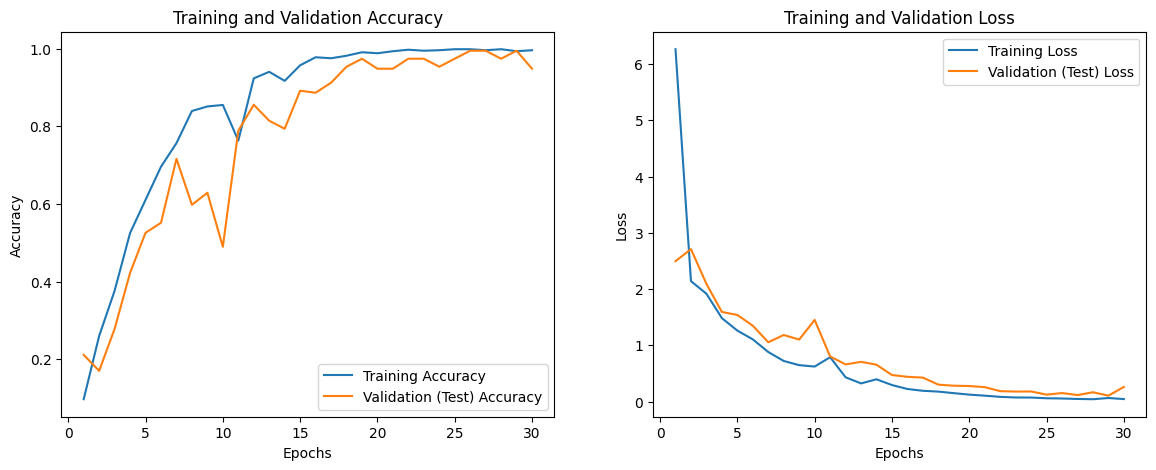

In [11]:
acc = history_mlp.history['accuracy']
val_acc = history_mlp.history['val_accuracy']
loss = history_mlp.history['loss']
val_loss = history_mlp.history['val_loss']
epochs_range = range(1, len(acc) + 1)
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation (Test) Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation (Test) Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [12]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model_cnn = Sequential()
model_cnn.add(Input(shape=(64, 64, 3)))
model_cnn.add(Conv2D(32, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(128, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(num_classes, activation='softmax'))
model_cnn.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model_cnn.summary()
history_cnn = model_cnn.fit(X_train, y_train,
                            validation_data=(X_test, y_test),
                            batch_size=32,
                            epochs=30)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 684,490 (2.61 MB)

 Trainable params: 684,490 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 230ms/step - accuracy: 0.1233 - loss: 2.3133 - val_accuracy: 0.1959 - val_loss: 2.2799
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 262ms/step - accuracy: 0.2598 - loss: 2.1962 - val_accuracy: 0.3557 - val_loss: 1.8261
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 208ms/step - accuracy: 0.5155 - loss: 1.5097 - val_accuracy: 0.5103 - val_loss: 1.4831
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 261ms/step - accuracy: 0.6486 - loss: 1.0306 - val_accuracy: 0.7835 - val_loss: 0.9254
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 210ms/step - accuracy: 0.8580 - loss: 0.4894 - val_accuracy: 0.9175 - val_loss: 0.4360
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 231ms/step - accuracy: 0.9654 - loss: 0.1902 - val_accuracy: 0.9485 - val_loss: 0.2721
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 273ms/step - accuracy: 0.9939 - loss: 0.0597 - val_accuracy: 0.9742 - val_loss: 0.1618
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 211ms/step - accuracy: 0.9976 - loss: 0.0195 - val_accuracy: 

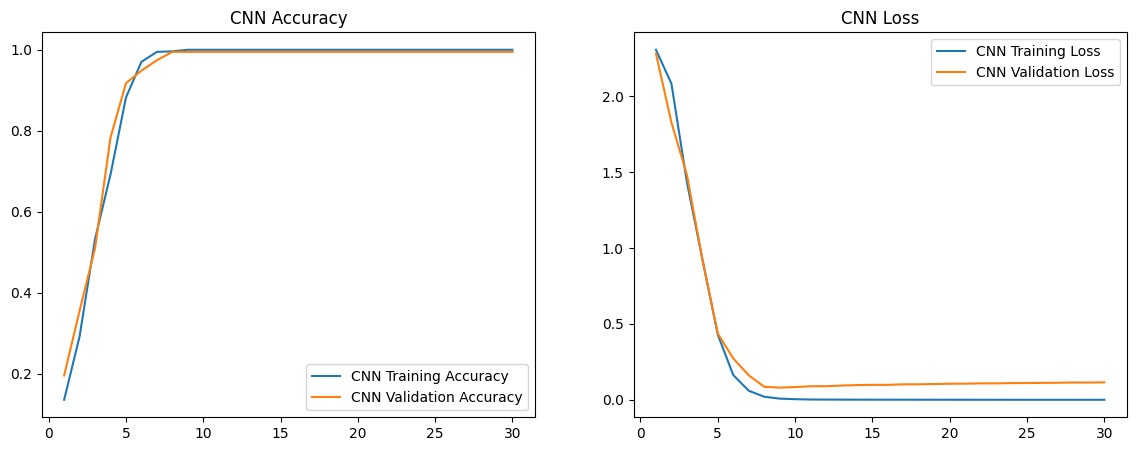

In [13]:
acc_cnn = history_cnn.history['accuracy']
val_acc_cnn = history_cnn.history['val_accuracy']
loss_cnn = history_cnn.history['loss']
val_loss_cnn = history_cnn.history['val_loss']
epochs_range = range(1, len(acc_cnn) + 1)
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_cnn, label='CNN Training Accuracy')
plt.plot(epochs_range, val_acc_cnn, label='CNN Validation Accuracy')
plt.title('CNN Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_cnn, label='CNN Training Loss')
plt.plot(epochs_range, val_loss_cnn, label='CNN Validation Loss')
plt.title('CNN Loss')
plt.legend()
plt.show()

Το CNN είναι ξεκάθαρα το βέλτιστο μοντέλο, καθώς επιτυγχάνει ταχεία σύγκλιση και σχεδόν τέλεια ακρίβεια, χωρίς την αστάθεια και το overfitting που παρουσιάζει το MLP. Η υπεροχή του οφείλεται στο ότι διατηρεί τη χωρική δομή της εικόνας και αναγνωρίζει μοτίβα ανεξάρτητα από τη θέση τους μέσω των φίλτρων, σε αντίθεση με το MLP που καταστρέφει τη γεωμετρία της εικόνας μετατρέποντάς τη σε μονοδιάστατο διάνυσμα.

In [14]:
from tensorflow.keras.layers import Dropout, BatchNormalization

model_improved = Sequential()
model_improved.add(Input(shape=(64, 64, 3)))
model_improved.add(Conv2D(32, (3, 3), activation='relu'))
model_improved.add(BatchNormalization())
model_improved.add(MaxPooling2D((2, 2)))
model_improved.add(Conv2D(64, (3, 3), activation='relu'))
model_improved.add(BatchNormalization())
model_improved.add(MaxPooling2D((2, 2)))
model_improved.add(Conv2D(128, (3, 3), activation='relu'))
model_improved.add(BatchNormalization())
model_improved.add(MaxPooling2D((2, 2)))
model_improved.add(Flatten())
model_improved.add(Dense(128, activation='relu'))
model_improved.add(Dropout(0.5))
model_improved.add(Dense(num_classes, activation='softmax'))
model_improved.compile(optimizer=Adam(learning_rate=0.001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])
history_improved = model_improved.fit(X_train, y_train,
                                      validation_data=(X_test, y_test),
                                      batch_size=32,
                                      epochs=30)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 381ms/step - accuracy: 0.2797 - loss: 3.0265 - val_accuracy: 0.1598 - val_loss: 2.3176
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 330ms/step - accuracy: 0.6173 - loss: 1.0952 - val_accuracy: 0.0928 - val_loss: 5.2686
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 317ms/step - accuracy: 0.7825 - loss: 0.5816 - val_accuracy: 0.0928 - val_loss: 8.9441
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 348ms/step - accuracy: 0.8173 - loss: 0.5265 - val_accuracy: 0.0928 - val_loss: 8.2593
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 296ms/step - accuracy: 0.8842 - loss: 0.3516 - val_accuracy: 0.1598 - val_loss: 7.4801
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 305ms/step - accuracy: 0.9080 - loss: 0.2890 - val_accuracy: 0.2062 - val_loss: 7.5235
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 356ms/step - accuracy: 0.9266 - loss: 0.2132 - val_accuracy: 0.2474 - val_loss: 6.0796
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 365ms/step - accuracy: 0.9373 - loss: 0.2003 - val_accuracy: 